In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Import the data and explore

In [2]:
df=pd.read_csv('employee_retention_data.csv',parse_dates=['join_date','quit_date'])
df['dept']=df['dept'].astype('category')
df['employee_id']=df['employee_id'].astype('int')

In [3]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315,4,marketing,14,101000.0,2014-10-13,NaT
3,662910,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971,2,data_science,23,276000.0,2011-10-17,2014-08-22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null int64
company_id     24702 non-null int64
dept           24702 non-null category
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), int64(3)
memory usage: 1.2 MB


#### It looks like that the null values in the quit_date column are for employees that have not quited. Using that we could make another data frame only with employees who have quited.

In [5]:
mask=df['quit_date'].notnull()
df_quit=df[mask].copy()

In [6]:
df_quit.sort_values(by=['join_date','company_id','dept','seniority','salary'],inplace=True)
df_quit.reset_index(inplace=True,drop=True)

In [72]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30,340.0
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01,767.0
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09,655.0
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22,788.0
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24,396.0


#### Q1:
Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id.

In [8]:
df_join_date=pd.DataFrame(df_quit.groupby(['company_id','join_date']).count()['employee_id'])
df_join_date.reset_index(inplace=True)
df_join_date.rename({'employee_id':'count'},inplace=True,axis=1)
df_join_date['count']=df_join_date['count'].fillna(0)

In [9]:
df_join_date.head()

,company_id,join_date,count
0,1,2011-01-24,25
1,1,2011-01-25,2
2,1,2011-01-26,2
3,1,2011-01-31,28
4,1,2011-02-01,7


In [10]:
df_quit_date=pd.DataFrame(df_quit.groupby(['company_id','quit_date']).count()['employee_id'])
df_quit_date.reset_index(inplace=True)
df_quit_date.rename({'employee_id':'quit_count'},inplace=True,axis=1)
df_quit_date['quit_count']=df_quit_date['quit_count'].fillna(0)

In [11]:
df_quit_date.head()

,company_id,quit_date,quit_count
0,1,2011-10-21,1
1,1,2011-11-11,1
2,1,2011-11-22,1
3,1,2011-11-25,1
4,1,2011-12-09,1


In [12]:
df_join_date['cumsum_join']=df_join_date.groupby('company_id')['count'].cumsum()

In [13]:
df_quit_date[df_quit_date['company_id']==3].head()

,company_id,quit_date,quit_count
770,3,2011-12-23,1
771,3,2011-12-30,1
772,3,2012-01-13,2
773,3,2012-01-20,1
774,3,2012-01-27,6


In [14]:
df_join_date.drop('count',inplace=True,axis=1)
df_join_date[df_join_date['company_id']==3].head()

,company_id,join_date,cumsum_join
1062,3,2011-01-24,9
1063,3,2011-01-25,10
1064,3,2011-01-26,12
1065,3,2011-01-31,19
1066,3,2011-02-01,20


In [15]:
df_merged=df_join_date.merge(df_quit_date,how='outer',left_on=['company_id',
                                                               'join_date'],right_on=['company_id','quit_date'])

In [16]:
df_merged['join_date']=df_merged['join_date'].fillna(df_merged['quit_date'])

In [17]:
df_merged.tail()

,company_id,join_date,cumsum_join,quit_date,quit_count
5975,12,2013-10-18,NaN,2013-10-18,1.0
5976,12,2013-10-25,NaN,2013-10-25,1.0
5977,12,2014-02-07,NaN,2014-02-07,1.0
5978,12,2014-09-19,NaN,2014-09-19,1.0
5979,12,2015-05-08,NaN,2015-05-08,2.0


In [18]:
df_merged.rename({'join_date':'date'},inplace=True,axis=1)

In [19]:
df_merged.drop('quit_date',inplace=True,axis=1)

In [20]:
df_merged['quit_count']=df_merged['quit_count'].fillna(0)

In [21]:
df_merged[df_merged['date']>'2012-01-01'].head()

,company_id,date,cumsum_join,quit_count
162,1,2012-01-03,1568.0,1.0
163,1,2012-01-04,1569.0,0.0
164,1,2012-01-05,1570.0,1.0
165,1,2012-01-09,1590.0,1.0
166,1,2012-01-10,1591.0,0.0


In [22]:
df_merged['headcount']=df_merged['cumsum_join']-df_merged['quit_count']

In [23]:
df_merged[df_merged['date']>'2012-01-01'].head()

,company_id,date,cumsum_join,quit_count,headcount
162,1,2012-01-03,1568.0,1.0,1567.0
163,1,2012-01-04,1569.0,0.0,1569.0
164,1,2012-01-05,1570.0,1.0,1569.0
165,1,2012-01-09,1590.0,1.0,1589.0
166,1,2012-01-10,1591.0,0.0,1591.0


In [24]:
df_merged.drop(['cumsum_join','quit_count'],inplace=True,axis=1)

In [25]:
df_merged.head()

,company_id,date,headcount
0,1,2011-01-24,25.0
1,1,2011-01-25,27.0
2,1,2011-01-26,29.0
3,1,2011-01-31,57.0
4,1,2011-02-01,64.0


In [26]:
df_merged=df_merged[['date','company_id', 'headcount']]

In [135]:
df_merged.head()

,date,company_id,headcount
0,2011-01-24,1,25.0
1,2011-01-25,1,27.0
2,2011-01-26,1,29.0
3,2011-01-31,1,57.0
4,2011-02-01,1,64.0


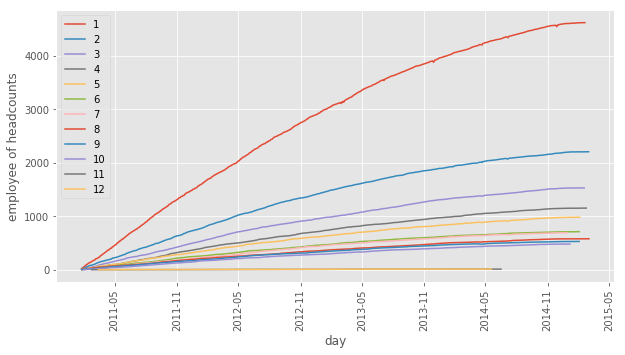

In [28]:
plt.figure(figsize=(10,5))
for i in sorted(df_merged['company_id'].unique()):
    plt.plot(df_merged[df_merged['company_id']==i]['date'],
             df_merged[df_merged['company_id']==i]['headcount'],label=i)
plt.xticks(rotation='vertical')
plt.ylabel('employee of headcounts')
plt.xlabel('day')
plt.legend()

#### Q2
What are the main factors that drive employee churn? Do they make sense? Explain your
findings.

"Employee churn is the overall turnover in an organization's staff as existing employees leave and new ones are hired. The churn rate is usually calculated as the percentage of employees leaving the company over some specified time period. Although some staff turnover is inevitable, a high rate of churn is costly."

In [29]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24


#### Let's add a column to the df_quit that indicates number of days they have worked.

In [30]:

df_quit['days']=df_quit['quit_date']-df_quit['join_date']
df_quit['days']=df_quit['days'].astype('timedelta64[D]')


In [31]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30,340.0
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01,767.0
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09,655.0
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22,788.0
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24,396.0


''

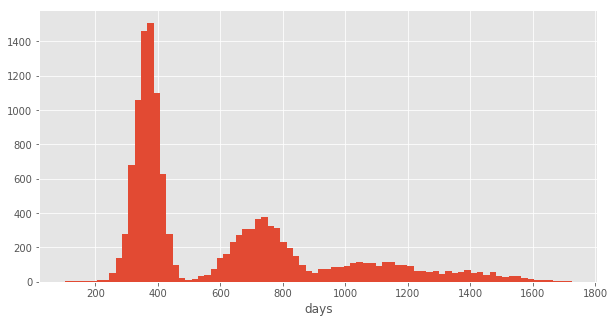

In [32]:
plt.figure(figsize=(10,5))
plt.hist(df_quit['days'],bins=80)
plt.xlabel('days')
;

#### It is clearly a multi modal distribution. Most people leave the first year. Plotting the distribution data for different  department or company  might help to understand what is going on.

''

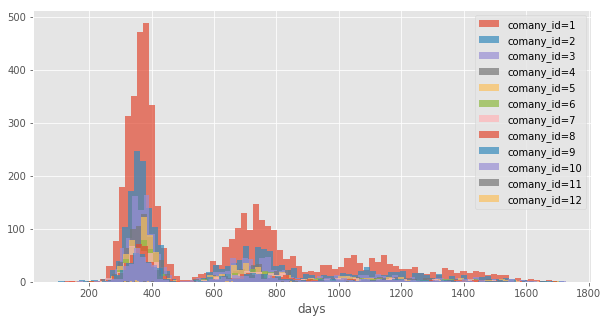

In [33]:
plt.figure(figsize=(10,5))
for i in df_quit['company_id'].unique():
    mask=(df_quit['company_id']==i)

    plt.hist(df_quit[mask]['days'],bins=80,alpha=.7,label='comany_id={}'.format(i))
plt.xlabel('days')
plt.legend()
;


The same pattern is present for all companies.

''

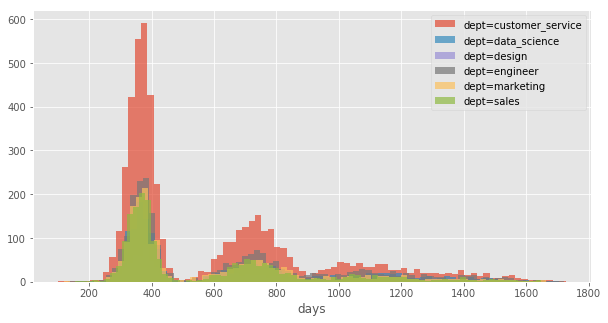

In [34]:
plt.figure(figsize=(10,5))
for i in df_quit['dept'].unique():
    mask=(df_quit['dept']==i)

    plt.hist(df_quit[mask]['days'],bins=80,alpha=.7,label='dept={}'.format(i))
plt.xlabel('days')
plt.legend()
;

Also the same pattern for different departments.It looks like that the number of people leave peaks after the end of 1, 2 and 3 years.

What about seniority and salary?
Let's check the correlation.

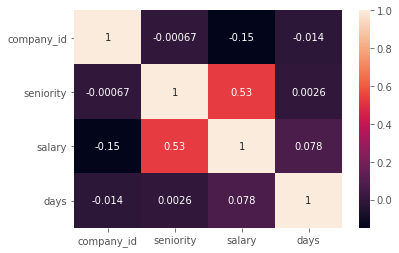

In [35]:
sns.heatmap(df_quit.drop('employee_id',axis=1).corr(),annot=True)

Hard to say if there is any correlation between the salary or seniority and the number of days.

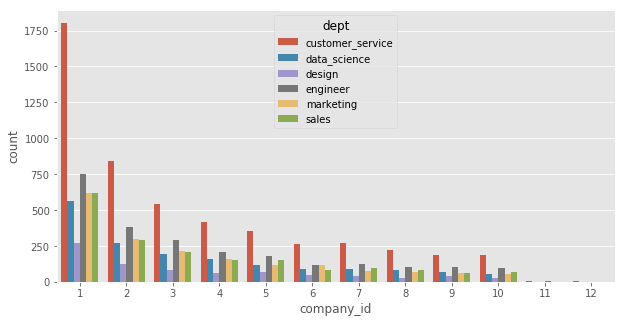

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(df_quit['company_id'],hue=df_quit['dept'])

In [48]:
df_total=df[[ 'company_id', 'dept', 'seniority', 'salary', 'join_date','quit_date']].copy()

In [57]:
mask=df_total['quit_date'].isnull()


In [69]:
idx=df_total[mask].index
df_total.loc[idx,'quit']=1

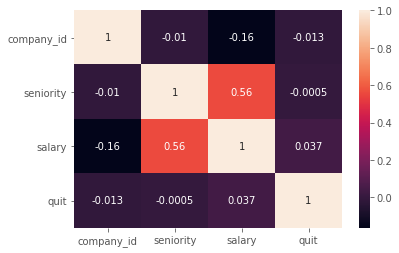

In [71]:
sns.heatmap(df_total.corr(),annot=True)

Let's explore the salary

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

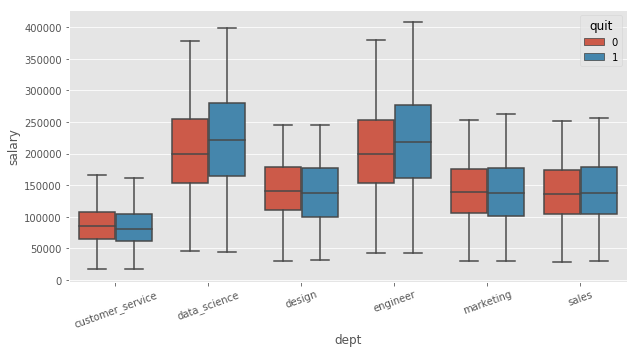

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_total['dept'],y=df_total['salary'],hue=df_total['quit'])
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

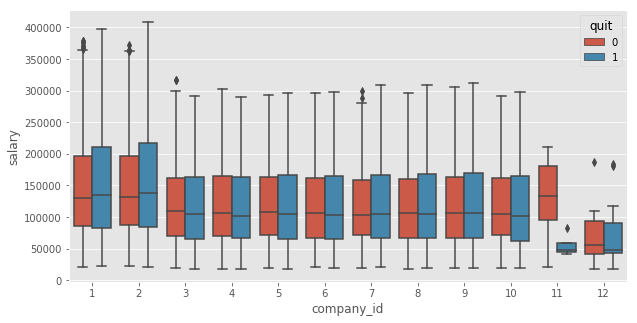

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_total['company_id'],y=df_total['salary'],hue=df_total['quit'])
plt.xticks(rotation=0)

#### Only for company 11 the salary of people who left is significantly lower than others.

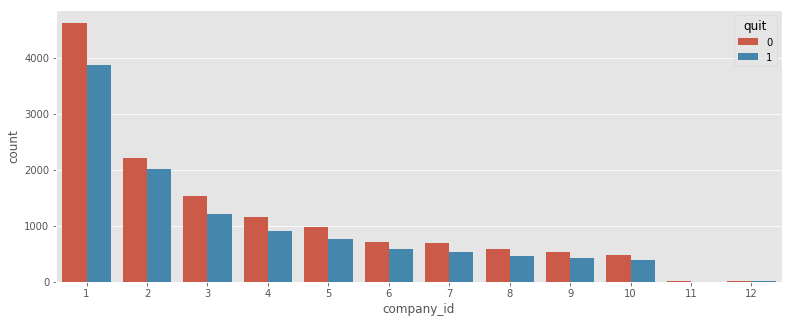

In [100]:
plt.figure(figsize=(13,5))
sns.countplot(df_total['company_id'],hue=df_total['quit'])

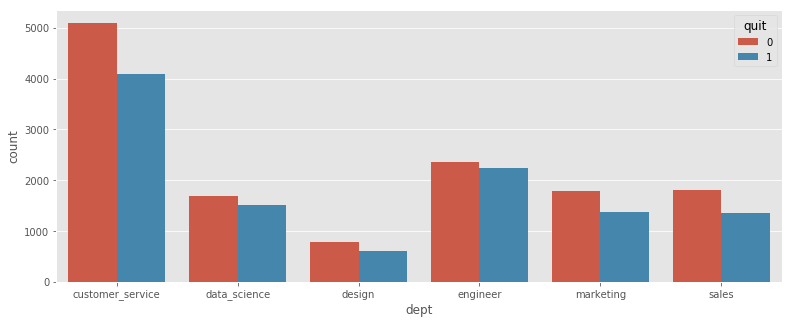

In [101]:
plt.figure(figsize=(13,5))
sns.countplot(df_total['dept'],hue=df_total['quit'])

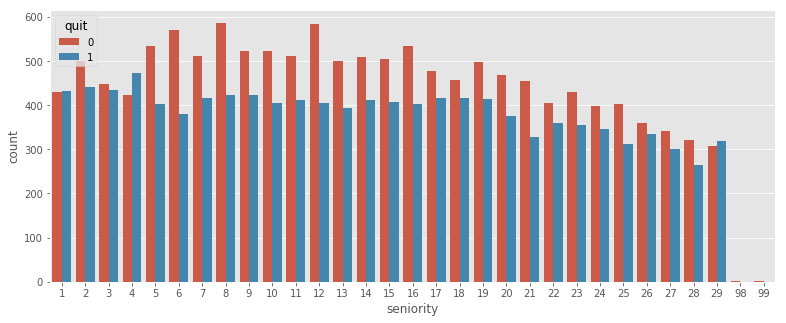

In [102]:
plt.figure(figsize=(13,5))
sns.countplot(df_total['seniority'],hue=df_total['quit'])

In [114]:
def seniority_level(sen):
    if sen<=5: return "1(1-5)"
    elif (sen>5) & (sen<=10): return "2(5-10)"
    elif (sen>10) & (sen<=15): return "3(10-15)"
    elif (sen>15) & (sen<=20): return "4(15-20)"
    elif (sen>20) & (sen<=25): return "5(20-25)"
    else: return "6(>25)"

In [115]:
df_total["sen_level"]=df_total['seniority'].apply(seniority_level)

In [116]:
df_total.head()

,company_id,dept,seniority,salary,join_date,quit_date,quit,sen_level
0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,0,6(>25)
1,7,marketing,20,183000.0,2013-04-29,2014-04-04,0,4(15-20)
2,4,marketing,14,101000.0,2014-10-13,NaT,1,3(10-15)
3,7,customer_service,20,115000.0,2012-05-14,2013-06-07,0,4(15-20)
4,2,data_science,23,276000.0,2011-10-17,2014-08-22,0,5(20-25)


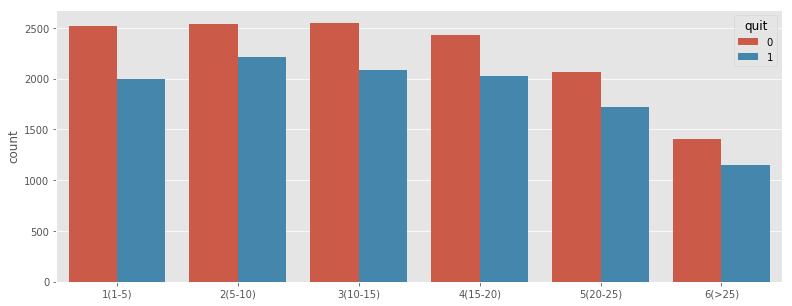

In [118]:
plt.figure(figsize=(13,5))
sns.countplot(sorted(df_total['sen_level']),hue=df_total['quit'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

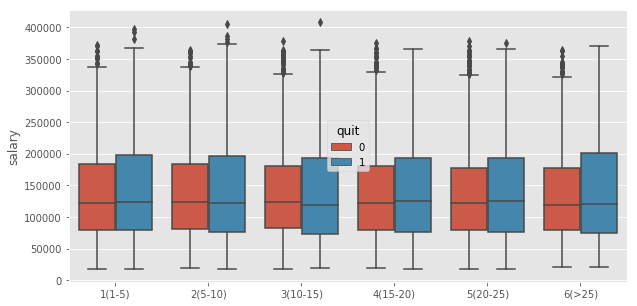

In [120]:
plt.figure(figsize=(10,5))
sns.boxplot(x=sorted(df_total['sen_level']),y=df_total['salary'],hue=df_total['quit'])
plt.xticks(rotation=0)

In [129]:
df_quit['year']=df_quit['quit_date'].apply(lambda x:x.year )

In [131]:
df_quit.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,days,year
0,733094,1,customer_service,1,30000.0,2011-01-24,2011-12-30,340.0,2011
1,554358,1,customer_service,8,67000.0,2011-01-24,2013-03-01,767.0,2013
2,418614,1,customer_service,9,77000.0,2011-01-24,2012-11-09,655.0,2012
3,224294,1,customer_service,14,92000.0,2011-01-24,2013-03-22,788.0,2013
4,224745,1,customer_service,19,108000.0,2011-01-24,2012-02-24,396.0,2012


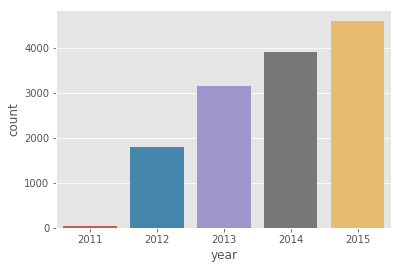

In [132]:
sns.countplot(df_quit['year'])

We have to normalize this. For that we have to calculate the number of total employees for each year.

In [153]:
df_total['quit_year']=df_total['quit_date'].apply(lambda x:x.year )

In [155]:
df_total['join_year']=df_total['join_date'].apply(lambda x:x.year )

In [136]:
df_merged['year']=df_merged['date'].apply(lambda x:x.year )

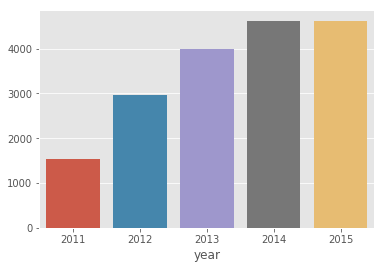

In [158]:
sns.barplot(df_merged.groupby('year')['headcount'].max().index,df_merged.groupby('year')['headcount'].max().values)

In [174]:
total_emps_year=df_merged.groupby('year')['headcount'].max().values
quit_year=df_quit.groupby('year')['employee_id'].count().values
nquit_year=quit_year/total_emps_year

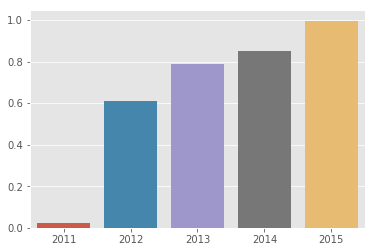

In [178]:
sns.barplot([2011, 2012, 2013, 2014, 2015],nquit_year)

In [179]:
for i in list(range(80)):
    a=13*i
    if a<=1000: print(a)
    b=31*i
    if b<=1000: print(b)

0
0
13
31
26
62
39
93
52
124
65
155
78
186
91
217
104
248
117
279
130
310
143
341
156
372
169
403
182
434
195
465
208
496
221
527
234
558
247
589
260
620
273
651
286
682
299
713
312
744
325
775
338
806
351
837
364
868
377
899
390
930
403
961
416
992
429
442
455
468
481
494
507
520
533
546
559
572
585
598
611
624
637
650
663
676
689
702
715
728
741
754
767
780
793
806
819
832
845
858
871
884
897
910
923
936
949
962
975
988
